In [28]:
import netCDF4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import ipywidgets as widgets
from functools import partial
import traitlets
from IPython.display import display

In [2]:
url='http://geoport.whoi.edu/thredds/dodsC/usgs/data2/emontgomery/stellwagen/Data/FI14/10001whr-cal.nc'

In [3]:
nc = netCDF4.Dataset(url)
ncv = nc.variables

In [4]:
def convert_epic_time(ncv):
    """ convert EPIC time and time2 variables to datenum64 """
    t1 = np.array(ncv['time'][:] - 2440588, dtype='int64')*3600*24*1000
    t2 = np.array(ncv['time2'][:], dtype='int64')
    return pd.to_datetime(t1+t2,unit='ms')

In [5]:
# if we find a time2 variable, convert EPIC time and time2 variables to datetime64 object
if 'time2' in ncv.keys():
    dt = convert_epic_time(ncv)

In [6]:
dt[0]

Timestamp('2014-02-07 14:51:29.999000')

In [7]:
dt.shape

(2134L,)

In [8]:
ncv['press']

<type 'netCDF4._netCDF4.Variable'>
int16 press(time, sample, lat, lon)
unlimited dimensions: 
current shape = (2134, 2048, 1, 1)
filling off

In [9]:
itime = 200

In [10]:
print(dt[itime])

2014-02-15 22:51:30


In [11]:
def my_plot(var_name='press',itime=0):
    var = ncv[var_name]
    plt.plot(var[itime,:,:,:].ravel())
    plt.title(dt[itime])

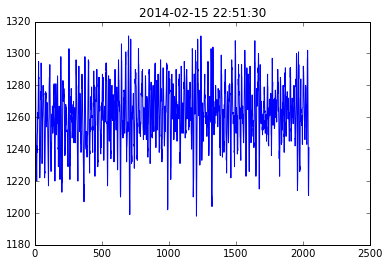

In [12]:
my_plot(var_name='press',itime=itime)

In [13]:
int(dt.shape[0])

2134

None

<function __main__.my_plot>

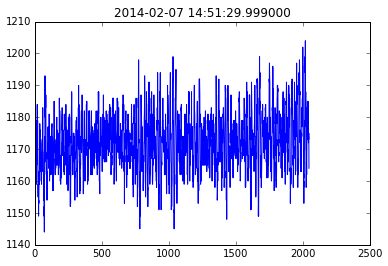

In [14]:
widgets.interact(my_plot, itime=(0,int(dt.shape[0]),1), var_name=ncv.keys() )

In [34]:
class Counter(widgets.DOMWidget):
    value = traitlets.CInt(0, sync=True)

In [35]:
def button_plus('>'):
    counter.value +=1  
    
def button_minus(counter):
    counter.value(-1) 

In [36]:
counter = Counter()

#wplus = widgets.Button(description='>')


#wminus = widgets.Button(description='<')

# integer slider
wpick = widgets.IntSlider(value=0,min=0,max=10,step=1,description="time step")

wplus.on_click(button_plus)
wminus.on_click(button_minus)

display(wminus, wpick, wplus)


AttributeError: 'Button' object has no attribute 'value'

AttributeError: 'Button' object has no attribute 'value'

In [37]:
counter.value 

0